# AllLife Bank Customer Segmentation

## Description and Context


AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help




## Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

## Data Dictionary:

- Sl_No: Primary key of the records

- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# NECESSARY CODING

### 1.0 Import necessary libraries

In [5]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [6]:
! pip install openpyxl

<IPython.core.display.Javascript object>

In [7]:
! pip install scikit-learn

<IPython.core.display.Javascript object>

In [8]:
! pip install scikit-learn==0.22.2

<IPython.core.display.Javascript object>

In [10]:
import sklearn.cluster as cl
import sklearn.utils as utils
import sklearn._build_utils

import sklearn

print(sklearn.__version__)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


0.22.2


<IPython.core.display.Javascript object>

In [11]:
my_dataset = pd.read_excel("Credit+Card+Customer+Data (1).xlsx")

print(my_dataset)

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2              

<IPython.core.display.Javascript object>

### 1.1 Load the dataset
The dataset containing Customers details is contained in the file titled "BankChurners.csv" in my particular directory.

In [13]:
my_dataset = pd.read_excel("Credit+Card+Customer+Data (1).xlsx")

<IPython.core.display.Javascript object>

In [14]:
# copying data to another varaible to avoid any changes to original data
data = my_dataset.copy()

<IPython.core.display.Javascript object>

### 1.2 Check out the shape of the dataset

In [15]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 660 rows and 7 columns.


<IPython.core.display.Javascript object>

In [16]:
data.drop(["Sl_No"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# There are 3 steps in Data Preprocessing:

# STEP A :Data format checking:
- Data Dimensioning
- checking the Data types

### 1.3A Checking the length of the dataset ()

In [17]:
len(data)

660

<IPython.core.display.Javascript object>

### 1.4A To view first 5 rows of the dataset

In [18]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

### 1.5A To view the last 5 rows of the dataset

In [19]:
data.tail()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0
659,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [20]:
# checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


<IPython.core.display.Javascript object>

### 1.6A To view 10 samples of the dataset

In [22]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
276,36340,15000,4,5,2,0
315,45673,19000,4,3,1,3
198,15546,19000,1,1,4,7
268,97109,17000,6,5,0,0
203,56624,9000,2,0,3,7
340,69028,7000,6,3,1,1
183,86410,16000,1,2,5,8
239,14263,16000,5,2,0,0
612,94391,157000,9,1,14,1
37,74126,17000,2,0,4,6


<IPython.core.display.Javascript object>

In [23]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


<IPython.core.display.Javascript object>

### 1.7A checking the names of the columns in the data

In [91]:
# Let us clean columns names
cols_init = data.columns.tolist()
cols_new = [item.split("(")[0].rstrip() for item in cols_init]
cols_units = ["(" + item.split("(")[-1] if "(" in item else None for item in cols_init]
print("New column names:\n", cols_new)
print("\nDescription/Units:\n", cols_units)

New column names:
 ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

Description/Units:
 [None, None, None, None, None, None]


<IPython.core.display.Javascript object>

In [92]:
data.columns = cols_new
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

# STEP B IN DATA PROCESSING-------Data Consistency:
- Checking for missing values.
- Checking for inconsistency.
- Checking for duplicate values.
- Checking for outliers.
- Checking data distribution and skewness

### 1.11B checking for missing values in the data.

In [160]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Customer Key           0.0
Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made       0.0
dtype: float64

<IPython.core.display.Javascript object>

#### Observations
1. There are no missing values in the dataset


### 1.10B checking if the dataset has duplicate values


In [161]:
data[data.duplicated()].count()


Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
1. There are no duplicate values in the dataset


In [24]:
# Let's see unique values
cols = data.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), data[col].unique())
    print("-" * 100)

Unique values in the column 'Customer Key' are 

 [87073 38414 17341 40496 47437 58634 48370 37376 82490 44770 52741 52326
 92503 25084 68517 55196 62617 96463 39137 14309 29794 87241 30507 61061
 24001 68067 65034 14854 81130 29112 13999 32550 82164 61517 28254 30888
 46388 74126 52142 37659 83132 20119 52363 50769 68502 99026 83326 62040
 37252 74625 51182 60301 96386 43886 78503 68419 32828 17937 71632 81566
 29759 36929 70248 91673 61355 60403 85868 76205 66524 69214 21976 35149
 27120 18821 33187 93482 90168 71881 59656 12026 99589 38970 57990 39447
 79694 79403 47296 37559 38165 49198 18007 59619 37016 91099 74704 25742
 11937 52736 88338 18916 92501 96213 26599 73007 97935 26089 14946 74795
 73435 41634 84069 83244 87291 18086 33369 15310 98499 35256 89007 93997
 16577 25440 81116 63663 69811 36111 39454 70199 11602 49697 28701 61627
 34103 14248 31256 45583 52750 95507 23743 53410 53898 66200 58389 61347
 59151 37802 60475 95489 77758 23768 87471 85707 97951 54785 97011 35103
 

<IPython.core.display.Javascript object>

In [28]:
data.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
5,58634,20000,3,0,1,8
6,48370,100000,5,0,11,2
7,37376,15000,3,0,1,1
8,82490,5000,2,0,2,2
9,44770,3000,4,0,1,7


<IPython.core.display.Javascript object>

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


<IPython.core.display.Javascript object>

In [32]:
type_cols = [
    "Customer Key",
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]

for item in type_cols:
    data[item] = pd.to_numeric(data[item])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


<IPython.core.display.Javascript object>

### We will use only a subset of the columns for clustering. 

In [33]:
cluster_cols = [
    "Customer Key",
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]


<IPython.core.display.Javascript object>

In [34]:
df1 = data[cluster_cols].copy()
df1.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [36]:
df1.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


<IPython.core.display.Javascript object>

**Observations**

- All columns are numeric in nature.
- The numerical variables have different ranges and have to be scaled before clustering.
- There are NO missing values in the dataset.

In [37]:
# Resetting the dataframe index
df1.reset_index(inplace=True, drop=True)


<IPython.core.display.Javascript object>

 # 1.16B Exploratory Data Analysis

In [38]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

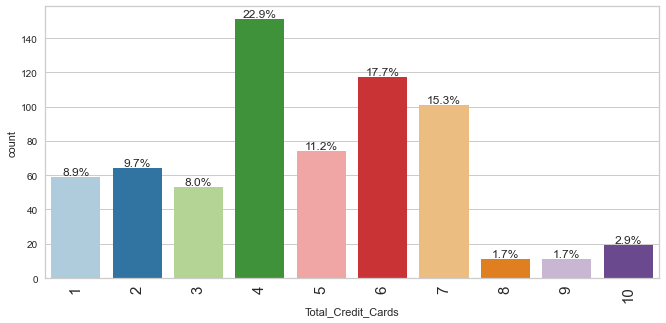

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df1, "Total_Credit_Cards", perc=True)

#### Observation
1. 22.9% of the customers have 4 credit cards.

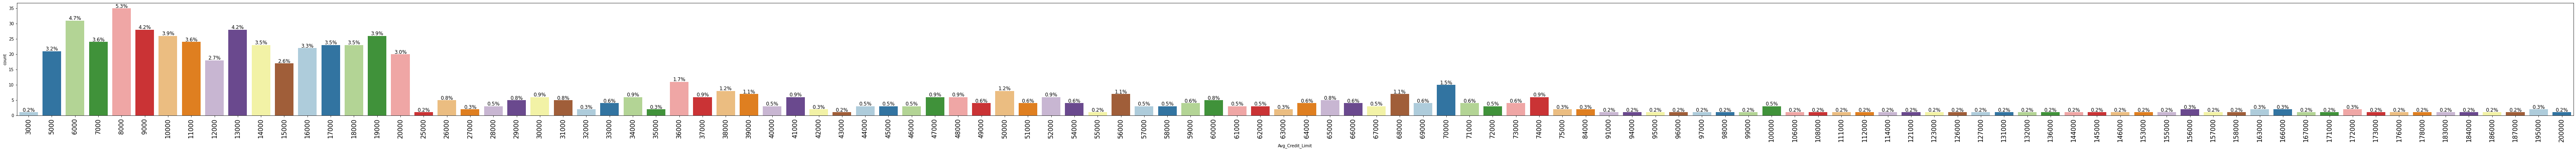

<IPython.core.display.Javascript object>

In [135]:
labeled_barplot(df1, "Avg_Credit_Limit", perc=True)

In [41]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

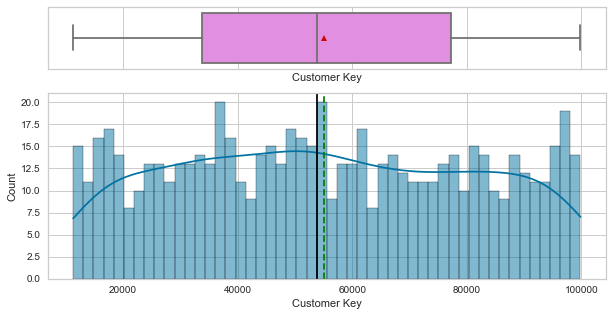

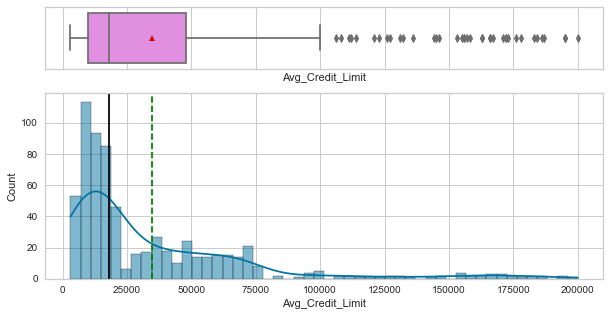

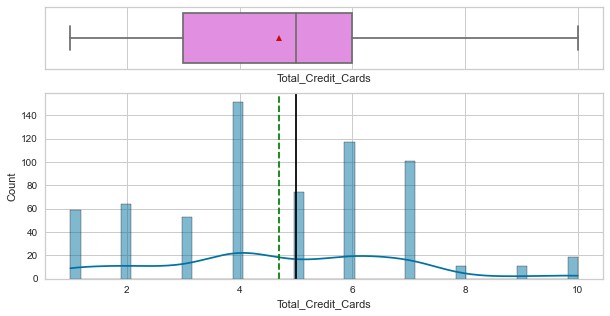

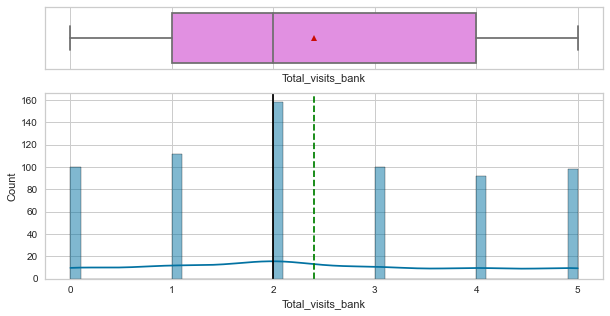

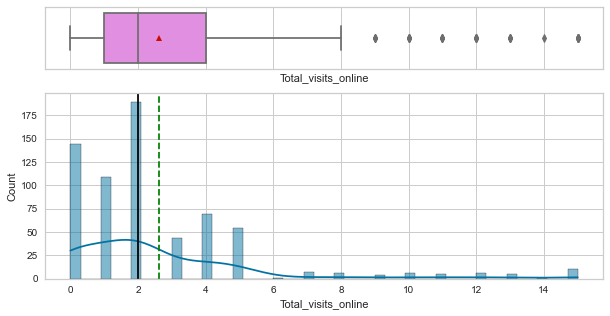

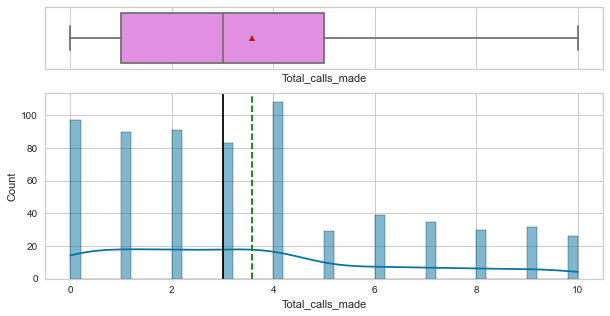

<IPython.core.display.Javascript object>

In [42]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

#### Observation.
1. The distribution for Avg_Credit_Limit is right-skewed, that is, and Average value is greater than the median.
2. 1. The **[Customer Key]** values are close to a normal distribution.
3. There are outliers in the ###{Total_visits_online} column, and#### in the ###{Avg_Credit_Card} column.

### Outlier- Treatment 
# Avg_Credit_Limit


In [43]:
quartiles = np.quantile(
    df1["Avg_Credit_Limit"][df1["Avg_Credit_Limit"].notnull()], [0.25, 0.75]
)
Avg_Credit_Limit_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Avg_Credit_Limit_4iqr}")
outlier_Avg_Credit_Limit = data.loc[
    np.abs(df1["Avg_Credit_Limit"] - df1["Avg_Credit_Limit"].median())
    > Avg_Credit_Limit_4iqr,
    "Avg_Credit_Limit",
]
outlier_Avg_Credit_Limit

Q1 = 10000.0, Q3 = 48000.0, 4*IQR = 152000.0


622    176000
624    178000
630    200000
631    195000
632    187000
637    173000
639    184000
645    171000
646    186000
647    183000
650    195000
654    172000
658    172000
Name: Avg_Credit_Limit, dtype: int64

<IPython.core.display.Javascript object>

### Outlier- Treatment 
# Total_visits_online


In [45]:
quartiles = np.quantile(
    df1["Total_visits_online"][df1["Total_visits_online"].notnull()], [0.25, 0.75]
)
Total_visits_online_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_visits_online_4iqr}")
outlier_Total_visits_online = data.loc[
    np.abs(df1["Total_visits_online"] - df1["Total_visits_online"].median())
    > Total_visits_online_4iqr,
    "Total_visits_online",
]
outlier_Avg_Credit_Limit

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0


622    176000
624    178000
630    200000
631    195000
632    187000
637    173000
639    184000
645    171000
646    186000
647    183000
650    195000
654    172000
658    172000
Name: Avg_Credit_Limit, dtype: int64

<IPython.core.display.Javascript object>

# 1.17B Bivariate Analysis.

Through bivariate analysis we try to analyze two variables simultaneously. I will try to determine if there is any relationship between two variables from the dataset.

For this type of analysis, we can use use:
1. Pairplot.
2. Heatmap function in seaborn.
3. Pointplot.
3. Barplot or
4. Scatter plot.

Exploring the Relationship between numerical variables using **pair plots** and **correlation plots**.

## plotting a Heatmap

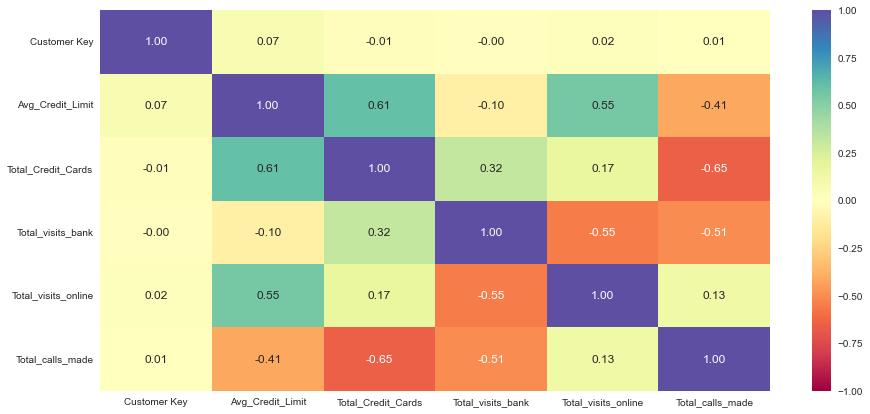

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- *Avg_Credit_Limit* is positively correlated with Total_Credit_Cards. The correlation is 0.61
- *Avg_Credit_Limit* is positively correlated with Total_visits_online. The correlation is 0.55

In [47]:
df1

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
...,...,...,...,...,...,...
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0


<IPython.core.display.Javascript object>

## Scaling the data before we proceed to cluster it ###.

In [55]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1.drop(["Customer Key"], axis=1)),
    columns=df1.drop(["Customer Key"], axis=1).columns,
)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

# Applying K-means Clustering

In [56]:
# copying the original dataset
df2 = df1.copy()
df2.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774463
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9431029376988643
Number of Clusters: 7 	Average Distortion: 0.9093041497895952
Number of Clusters: 8 	Average Distortion: 0.8901977398436961
Number of Clusters: 9 	Average Distortion: 0.866534931019458
Number of Clusters: 10 	Average Distortion: 0.8419245558799923
Number of Clusters: 11 	Average Distortion: 0.8202974810966542
Number of Clusters: 12 	Average Distortion: 0.8031242137405663
Number of Clusters: 13 	Average Distortion: 0.7862619283691007
Number of Clusters: 14 	Average Distortion: 0.7703717286407294


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

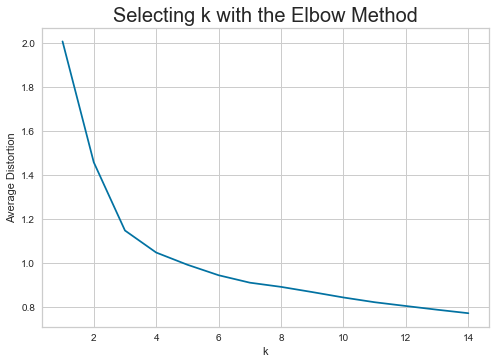

<IPython.core.display.Javascript object>

In [57]:
clusters = range(1, 15)
meanDistortions = []


for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 2 to 4.**

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.25602552465167167
For n_clusters = 7, silhouette score is 0.2495425839539578
For n_clusters = 8, silhouette score is 0.22747555247830298
For n_clusters = 9, silhouette score is 0.22705357730718603


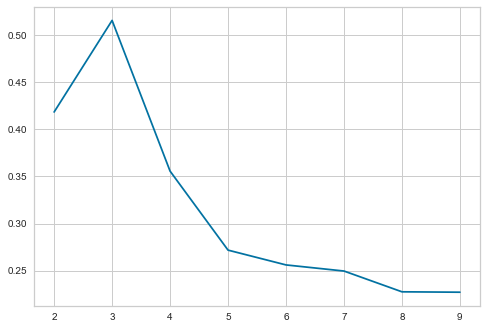

<IPython.core.display.Javascript object>

In [58]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

### Checking the silhouette scores.##

For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.27239829454176767
For n_clusters = 6, silhouette score is 0.2558123746389958
For n_clusters = 7, silhouette score is 0.24865472065730512


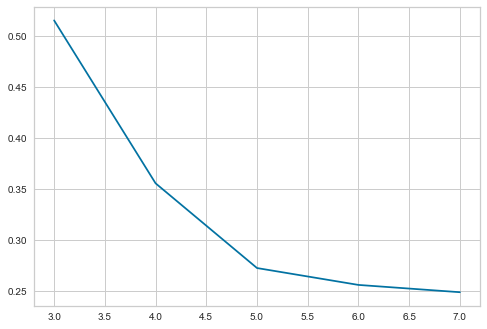

<IPython.core.display.Javascript object>

In [59]:
sil_score = []
cluster_list = list(range(3, 8))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

From the silhouette scores, it seems that 5 is a good value of k.

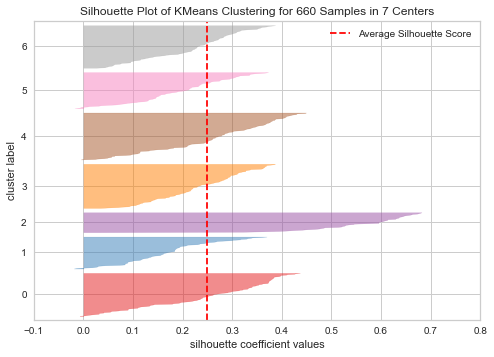

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [63]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

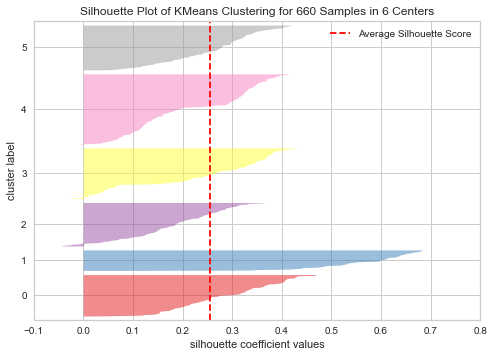

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [64]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

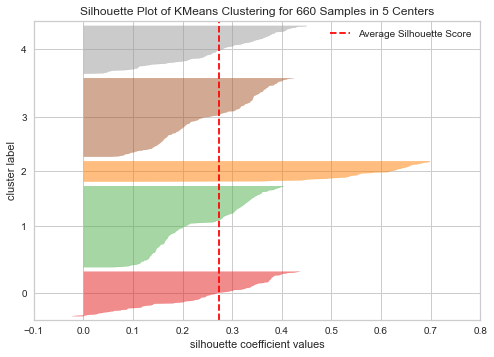

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [65]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

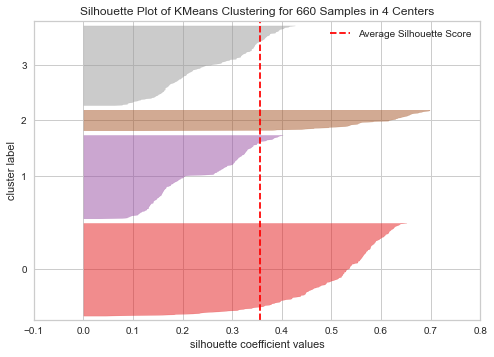

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [67]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.

In [68]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

In [70]:
# adding kmeans cluster labels to the original dataframe
df2["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [71]:
cluster_profile = df2.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [72]:
cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [73]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,,
0,54073.484694,36260.204082,5.551020,2.494898,0.954082,2.061224,196
1,54766.317073,12300.813008,2.357724,0.878049,3.626016,8.398374,123
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,55714.684211,31226.315789,5.478947,4.515789,1.010526,1.936842,190
4,55816.485149,12019.801980,2.475248,1.000000,3.465347,5.009901,101


<IPython.core.display.Javascript object>

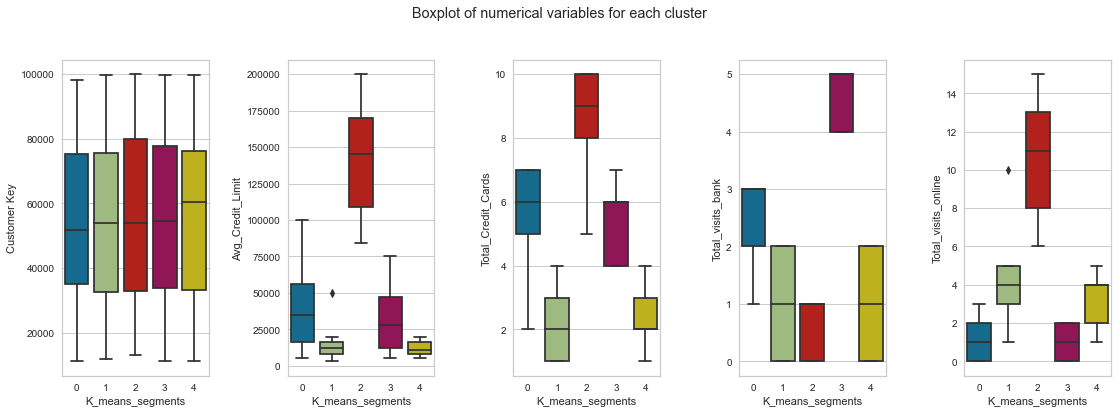

<IPython.core.display.Javascript object>

In [74]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[num_cols[counter]], x=df2["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

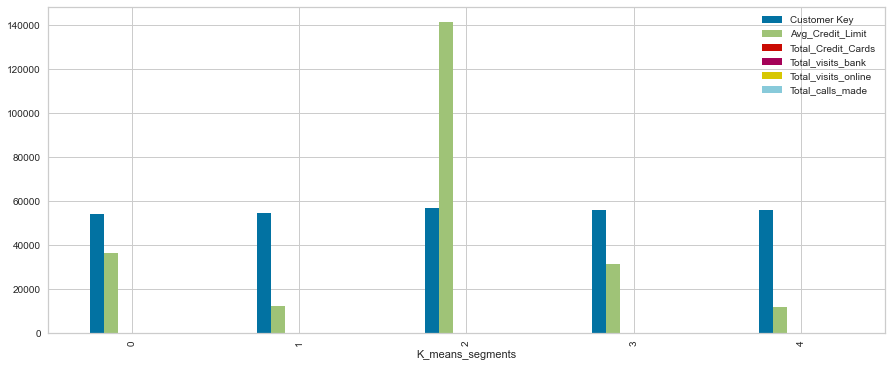

<IPython.core.display.Javascript object>

In [123]:
df2.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

## Insights

Cluster 0:
- The Customer Key are low to moderate.
- The Avg_Credit_Limit is low in this cluster.

Cluster 1:
- The Customer Key are low to moderate.
- The Avg_Credit_Limit is very low in this cluster.

Cluster 2:
- The Customer Key are low to moderate.
- The Avg_Credit_Limit is very high in this cluster.

Cluster 3:
- The Customer Key are low to moderate.
- The Avg_Credit_Limit is low in this cluster.

Cluster 4:
- The Customer Key are low to moderate.
- The Avg_Credit_Limit is low in this cluster.




## Business Recommendations
- Cluster 2: These group of customers have high average credit limit for all credit cards. his reveals the spending pattern of these group of customers. It indicates that these cluster of customers are likely to spend more since they have higher credit limit. Hence, AllLife Bank should know that these group of customers are more likely to opt in for more card services. 


- Cluster 1: These group of customers have the is very low Avg_Credit_Limit. In order to attract the customers in this group, AllLife Bank should create services that are more favourable to these group of customers.



# Applying Hierarchical Clustering

In [76]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553607.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875355.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

<IPython.core.display.Javascript object>

In [77]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Exploring different linkage methods with Euclidean distance only.**

In [79]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


<IPython.core.display.Javascript object>

In [80]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**The cophenetic correlation is maximum with Euclidean distance and average linkage.**

**The dendrograms for the different linkage methods IS SHOWN BELOW.**

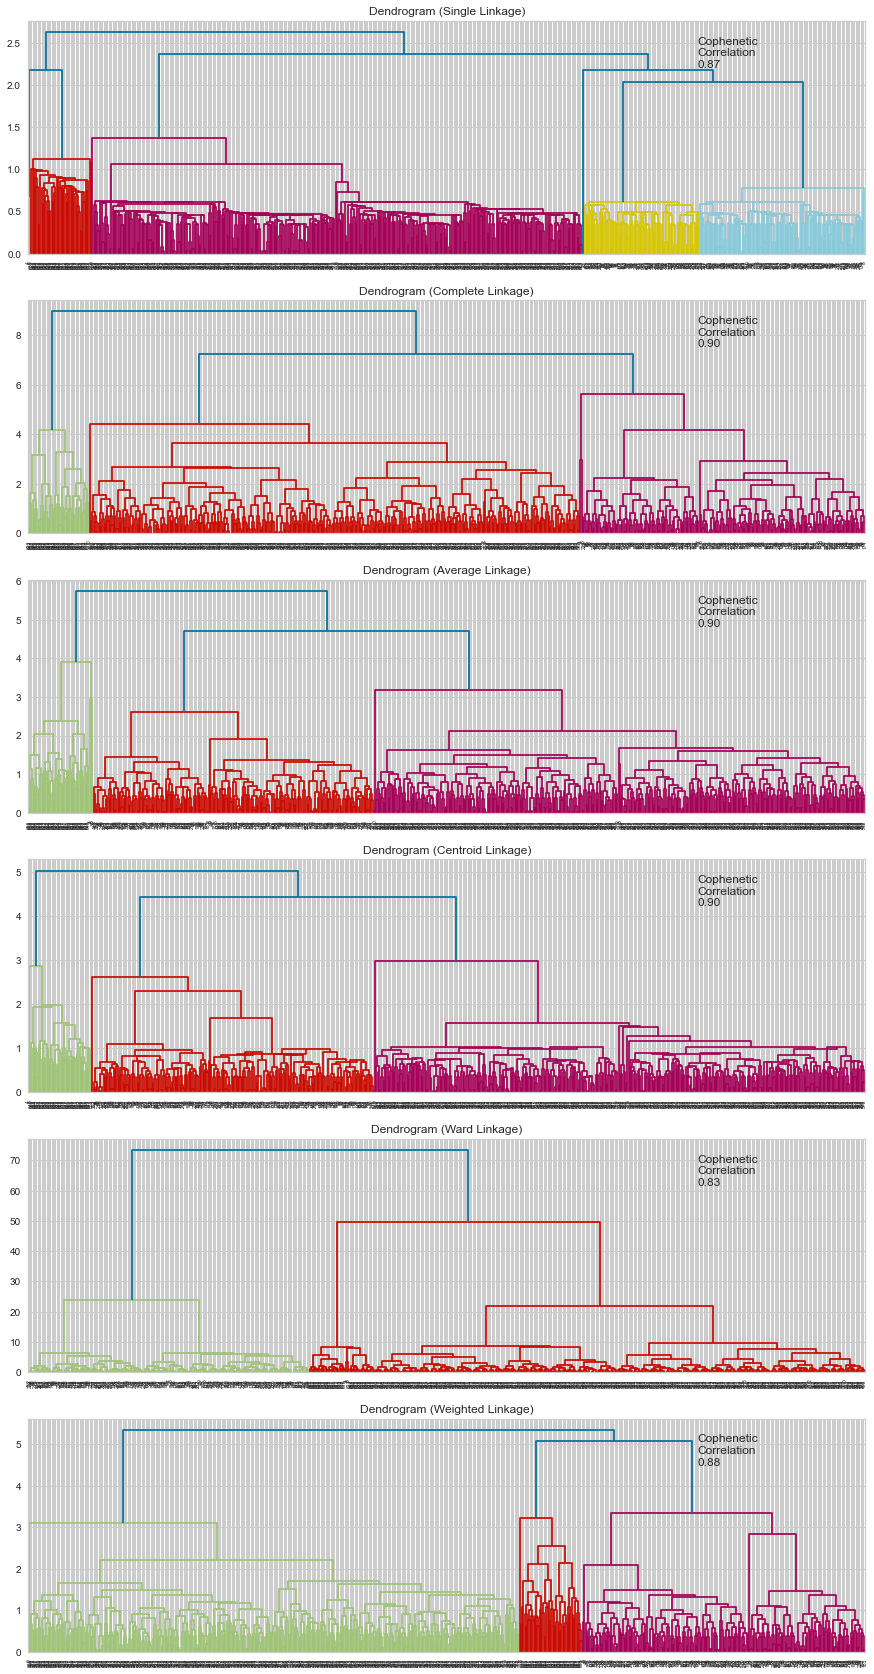

<IPython.core.display.Javascript object>

In [89]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [110]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5)

<IPython.core.display.Javascript object>

In [111]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [112]:
cluster_profile = df1.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [113]:
cluster_profile["count_in_each_Customer-key"] = (
    df1.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [114]:
# let's see the customers in each cluster


for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 4, the following customers are present:
[87073]

In cluster 0, the following customers are present:
[38414 47437 48370]

In cluster 2, the following customers are present:
[17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486 31903
 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398 32352
 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328 20072
 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504 53207
 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652 73952
 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033 85337
 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878 78002
 83459 91987 51552 72156 24998 45673 11596 87485 28414 81863 33240 11466
 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437 22610
 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897 46223
 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886 66804
 47866 61996 1

<IPython.core.display.Javascript object>

#### Observation

1. **We see that there is 1 cluster of 3 Customer Key, and 1 cluster of ONE Customer Key. 

2. There are 3 clusters with alot of Customer Keys.

This clustering does not look good as some of the clusters do not have enough variability.**

**The Ward linkage has more distinct and separated clusters (as seen from it's dendrogram before). 
5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.** So, the Ward Linkage might be the best measure.

In [115]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

<IPython.core.display.Javascript object>

In [116]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [117]:
cluster_profile = df1.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [118]:
cluster_profile["count_in_each_Customer-key"] = (
    df1.groupby("HC_Clusters")["Customer Key"].count().values
)

<IPython.core.display.Javascript object>

In [119]:
# let's see the Avg_Credit_Limit of the customers in each cluster


for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following customers are present:
[87073 17341 40496 54838 35254 97825 35483 45909 14263 46813 35549 39122
 81531 18595 40898 27101 45088 65372 56843 20072 47496 53936 66504 51319
 21233 74544 45652 77026 49331 54906 94666 11698 34677 57565 31384 16374
 91987 51552 72156 24998 45673 81863 23881 44645 17933 47437 85614 96548
 19137 69028 67046 64897 36628 17565 11799 81940 66706 87838 47866 61996
 15318 89635 71862 82376 80347 17649 44579 61994 24702 27824 45878 72431
 19215 85122 55060 31113 68439 88207 96929 78618 31551 29864 45440 97954
 90189 55090 88884 45808 53932 65908 25321 48602 48657 49913 53002 82807
 93496 37252 41287 52460 58019 87219 36839 12663 48667 42887 14439 81166
 14816 11265 84351 89446 64774 53166 45341 36504 15798 84360 46776 67258
 44804 29919 74446 36632 76024 75065 51682 56367 95147 23102 49690 20043
 53552 62530 41741 61216 83192 82023 64550 17382 27117 21717 81910 76492
 43000 48692 43034 13140 91242 63710 90860 58708 57451 43679 26334 47848


<IPython.core.display.Javascript object>

#### Observation
This clusters has more variability. 

In [120]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_Customer-key
HC_Clusters,,,,,,,
0,54291.525510,37520.408163,5.642857,2.525510,0.974490,2.142857,196
1,55577.015707,29806.282723,5.376963,4.471204,0.994764,1.863874,191
2,56350.039216,139254.901961,8.627451,0.588235,10.882353,1.235294,51
3,52144.687023,11908.396947,2.603053,0.961832,3.358779,5.580153,131
4,59694.483516,12197.802198,2.109890,0.890110,3.780220,8.736264,91


<IPython.core.display.Javascript object>

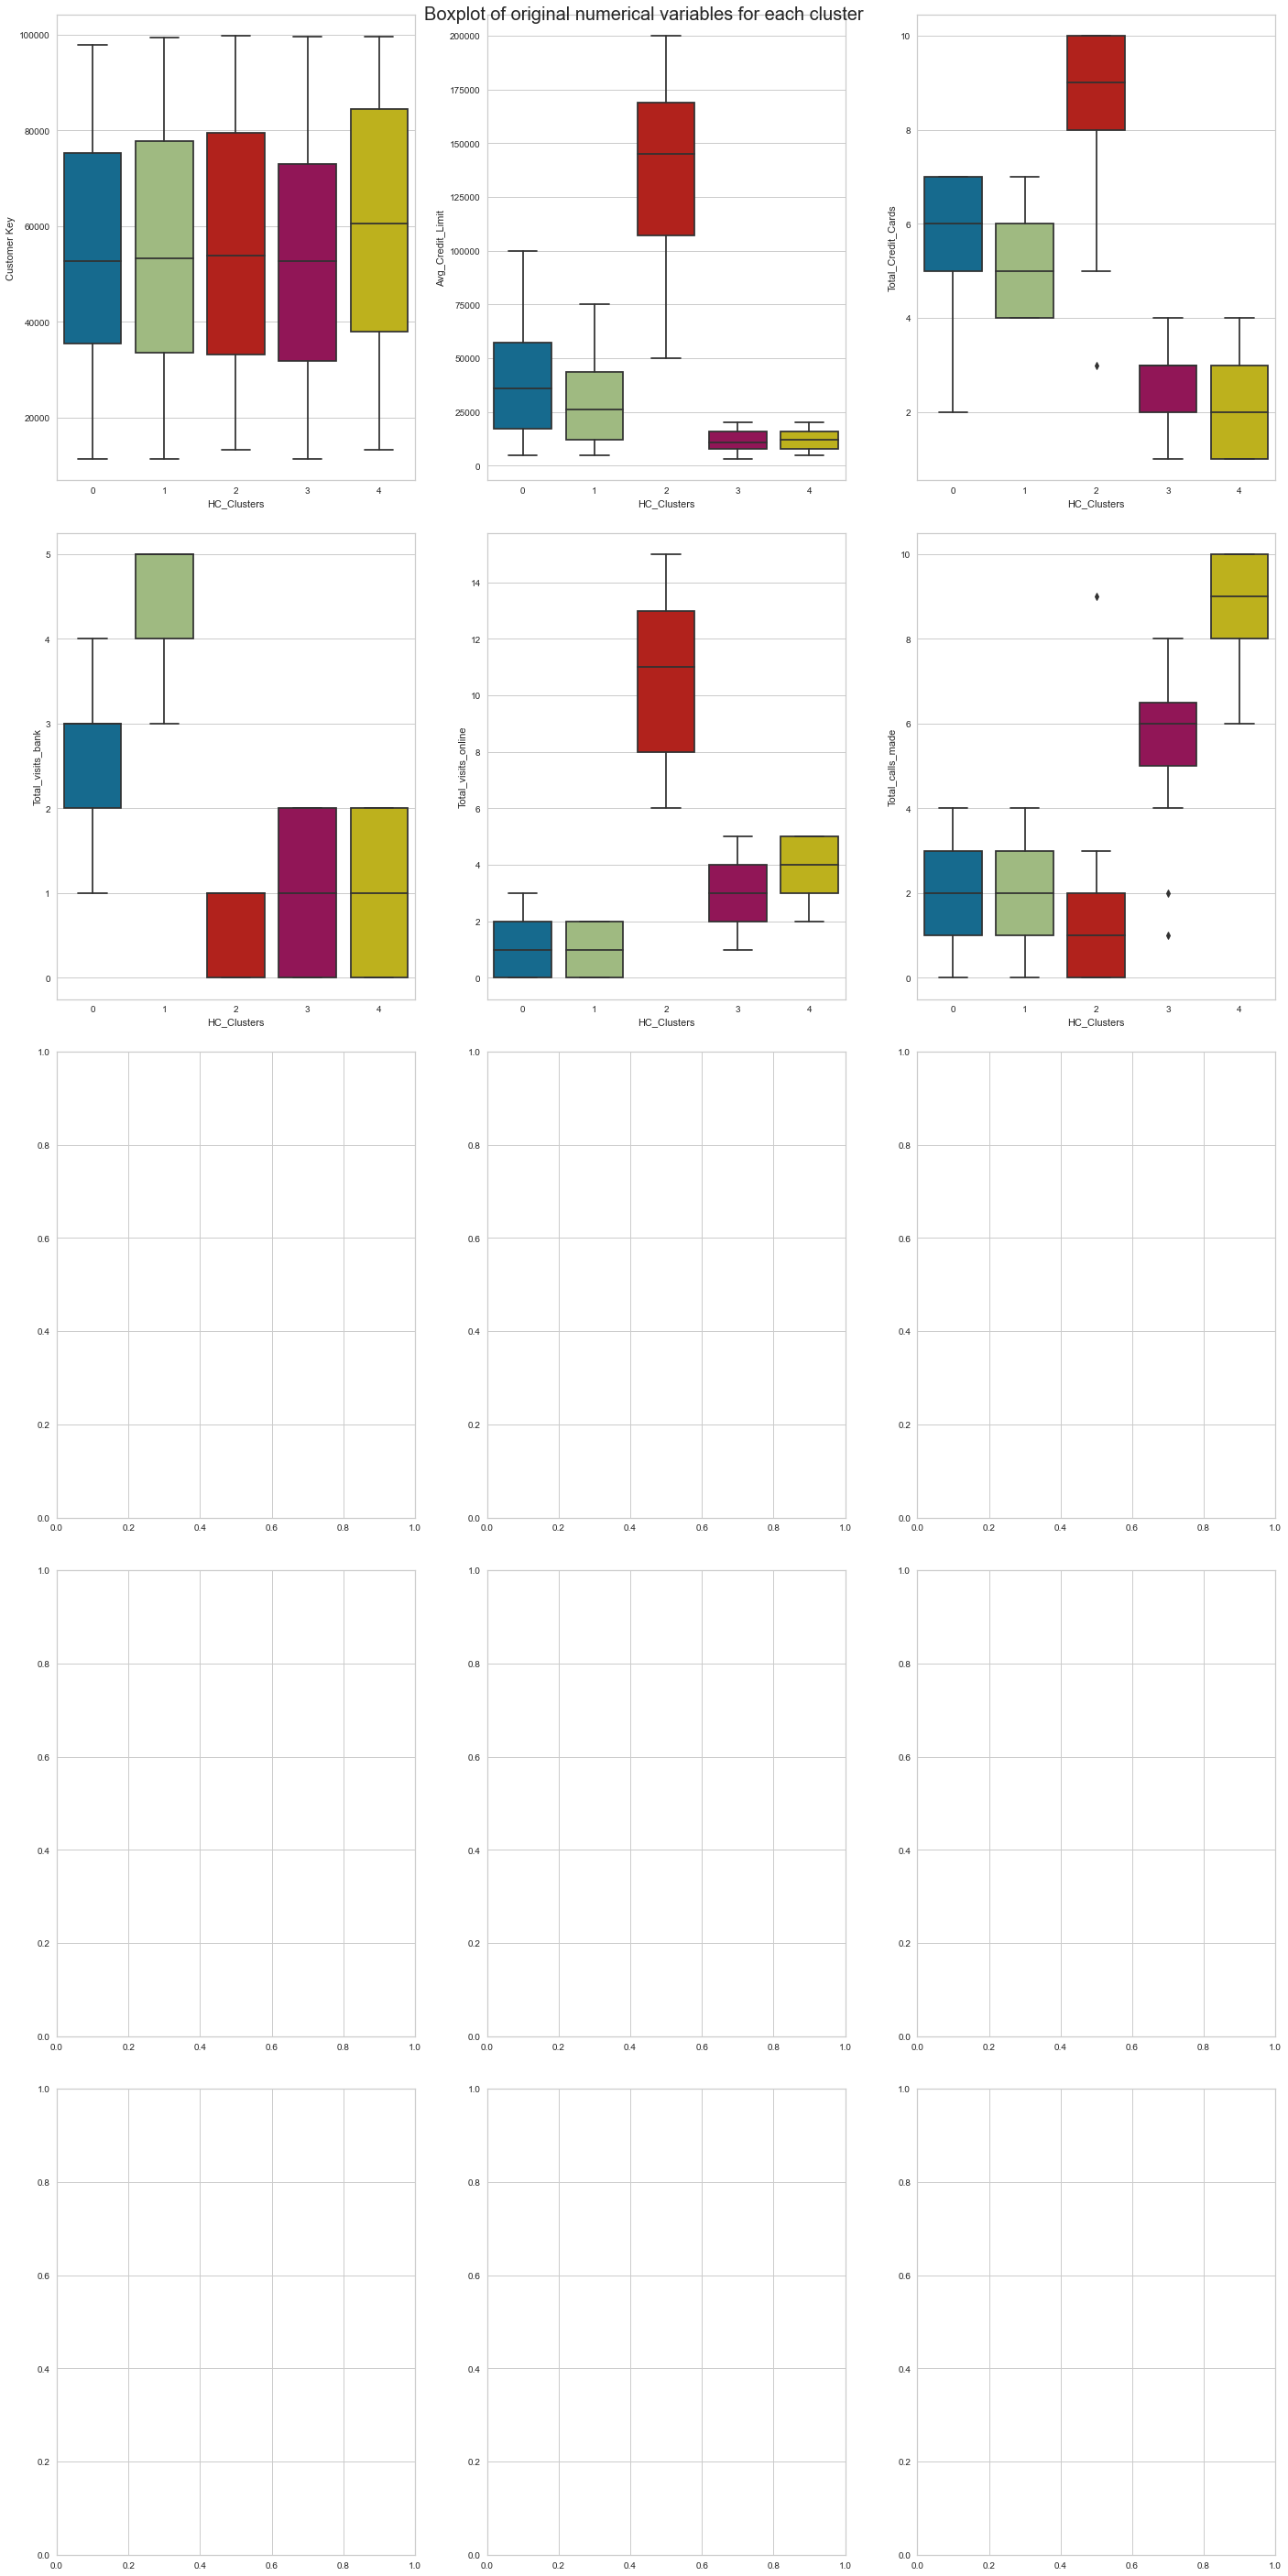

<IPython.core.display.Javascript object>

In [121]:
fig, axes = plt.subplots(5, 3, figsize=(20, 40))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(2):
    sns.boxplot(ax=axes[ii][0], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights


- **Cluster 0**
   
   - The Customer Key ranges from Low to moderately high.
   - The Average credit limit of each customer for all credit cards is low.
   - The Total number of credit cards possessed by the customer is within 2-3.
   - The Total number of visits that customer made (yearly) personally to the bank is MODERATE(2-3 TIMES)
   - The Total number of visits or online logins made by the customer (yearly) is very LOW (0-2)
   - The Total number of calls made by the customer to the bank or its customer service department (yearly) is low. Within (1-3).


- **Cluster 1**

  - The Customer Key ranges from Low to moderately high.
   - The Average credit limit of each customer for all credit cards is low.
   - The Total number of credit cards possessed by the customer is 5-7.
   - The Total number of visits that customer made (yearly) personally to the bank is  very high(4-5 TIMES)
   - The Total number of visits or online logins made by the customer (yearly) is very LOW (0-2)
   - The Total number of calls made by the customer to the bank or its customer service department (yearly) is low. Within (1-3).

   

- **Cluster 2**

  - The Customer Key ranges from Low to moderately high.
   - The Average credit limit of each customer for all credit cards ranges from moderate to high.
   - The Total number of credit cards possessed by the customer is 5-7.
   - The Total number of visits that customer made (yearly) personally to the bank is  very low(0-1 TIME)
   - The Total number of visits or online logins made by the customer (yearly) ranges from moderate to high (8-13) times.
   - The Total number of calls made by the customer to the bank or its customer service department (yearly) is within (5-7).
   



- **Cluster 3**

  

   - The Average credit limit of each customer for all credit cards is extremely low.
   - The Total number of credit cards possessed by the customer is 2-7.
   - The Total number of visits that customer made (yearly) personally to the bank is (0-1 TIME)
   - The Total number of visits or online logins made by the customer (yearly) ranges from (2-4) times.
   - The Total number of calls made by the customer to the bank or its customer service department (yearly) is low. Within (1-3).
   

- **Cluster 4**
   
   - The Customer Key ranges from 35000+ to 80000+.
   - The Average credit limit of each customer for all credit cards is very low.
   - The Total number of credit cards possessed by the customer is within 0-2.
   - The Total number of visits that customer made (yearly) personally to the bank is MODERATE(0-2 TIMES)
   - The Total number of visits or online logins made by the customer (yearly) is very LOW (3-5)
   - The Total number of calls made by the customer to the bank or its customer service department (yearly) is extremely high. Within (8-10).




# Recommendations



1. In  **Cluster 2**, - The Average credit limit of each customer for all credit cards ranges from moderate to high. The Total number of credit cards possessed by the customers in this cluster is 5-7. This suggests that they are the existing customers. Possibly, it also suggest that they spend more. These group of customers also prefer online or in-person method of interaction.


2. In  **Cluster 4**,The Total number of calls made by the customers  is extremely high. Within (8-10). This suggest that their preferred means of communication is through phone. Hence, AllLife Bank should implement this method of communication for these cluster of customers.

3. Furthermore, the average credit limit of each customer in **Cluster 4** for all credit cards is very low. The Total number of credit cards possessed by these customers is within 0-2. Hence, AllLife Bank should target these set of new customers in order to grow the number of credit card users. AllLife Bank should create packages that will be suitable for these group of customers.



# K-means vs Hierarchical Clustering

1. In K-means, 5 clusters were obtained.
2. In Hierarchical Clustering, 6 clusters were obtained.
